## Recommended Venues in the top 10 places to live.

### Introduction
As a city/place gets a larger population venues will want to know what is recommended to keep up with a ever changing landscape of people coming into the city. While some recommended venues can be fads, providing venues with information of what is recommended can allow them to compete. This also can be used by individuals who want to open up a venue to compete against what is recommended.
#### Assumptions being made:
- Places ranked in the top 10 places to live will see a larger population boom than those further down. This could lead to a larger variety of recommended spots as a variety of people will move to these locations.
- Venues will want to know what is recommended if they see lower turnout to their venues.
- There might be similarities in the individuals that move to the places that move to the top places to live.
- Venues will want to adjust their marketing strategy based on what is recommended. Perhaps create partnerships with the recommended venues.

### Data
I will be using the US News Best Places to Live Ranking to determine which cities to look at. https://realestate.usnews.com/places/rankings/best-places-to-live . As of the writing of this report the top 10 places to live are:

1. Austin, TX
2. Denver, CO
3. Colorado Springs, CO
4. Fayetteville, AR
5. Des Moines, IA
6. Minneapolis-St. Paul, MN
7. San Francisco, CA
8. Portland, OR
9. Seattle, WA
10. Raleigh, NC

I will focus on those 10 when I look at the recommended spots for the cities using the Foursquare API. https://developer.foursquare.com/docs/api/venues/explore

Some analytics I want to do are:
- See what kind of recommended venues there are in each city.
- See if there is commonality in the recommended venues among the cities. I.e. Are the same types of venues recommended in the cities as a whole.

In [9]:
cities = ["Austin,TX", "Denver,CO", "Colorado Springs,CO", "Fayetteville,AR", "Des Moines,IA", "Minneapolis,MN",
         "San Francisco,CA", "Portland,OR", "Seattle,WA", "Raleigh,NC"]

In [10]:
CLIENT_ID = "3CVJERIAHZ2N5YNZ51ARVNNZCLU3XRL4FB2EI0YOIVU4FSBU"
CLIENT_SECRET = "YXCE23UOGFY00AUVMSTEKN2UORNOESPEBXMVPOCS4A51CPTM"
VERSION = '20180605'
EXPLORE_API = "https://api.foursquare.com/v2/venues/explore"

In [12]:
# import the necessary libraries for data analytics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import json

def parse_recommended_categories(items):
    categories = []
    for item in items:
        venue_categories = item["venue"]["categories"]
        for venue_category in venue_categories:
            categories.append(venue_category["name"])
    return categories

def get_recommended_venues_series(city):
    # limit=20&radius=2000&client_id={}&client_secret={}&v={}&near={}
    params = dict(
        near=city,
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        v=VERSION,
        limit=20,
        radius=2000
    )
    data = requests.get(url=EXPLORE_API,params=params)
    full_response = data.json()
    interesting_portion = full_response['response']['groups'][0]["items"]
    series = pd.Series(parse_recommended_categories(interesting_portion))
    return series

# create series for the various cities.
city_series = []
for city in cities:
    city_series.append(get_recommended_venues_series(city))

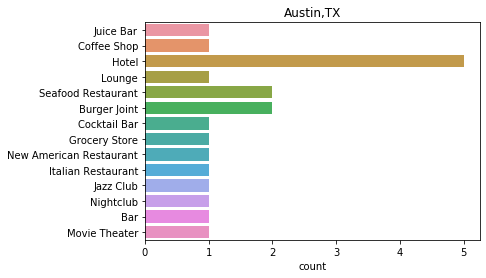

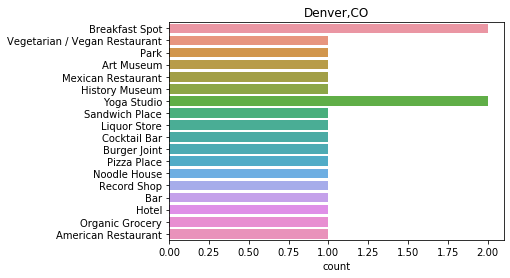

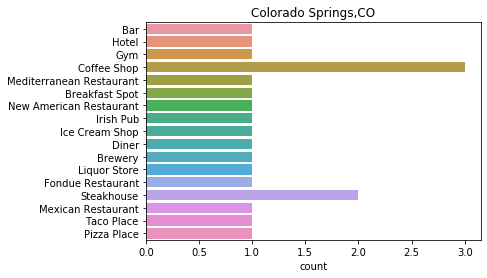

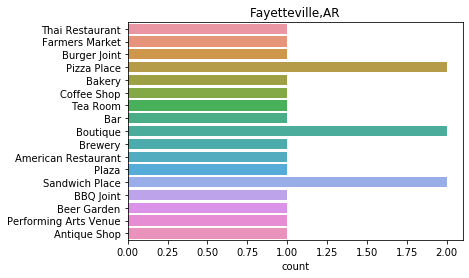

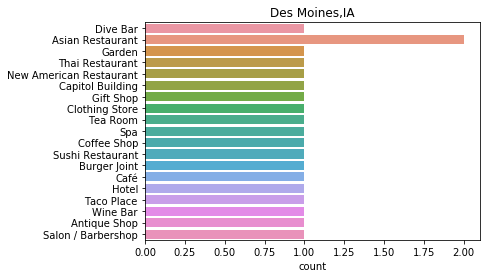

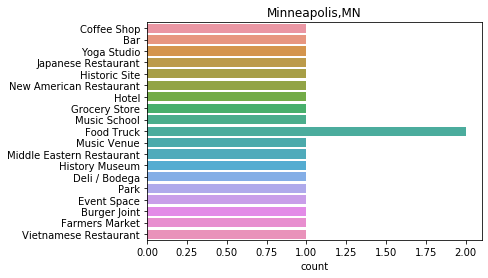

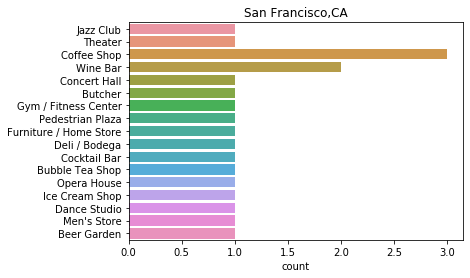

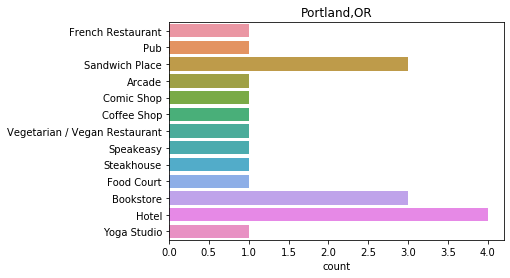

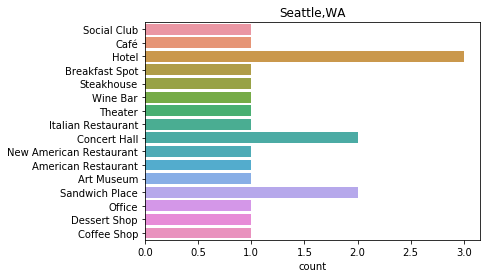

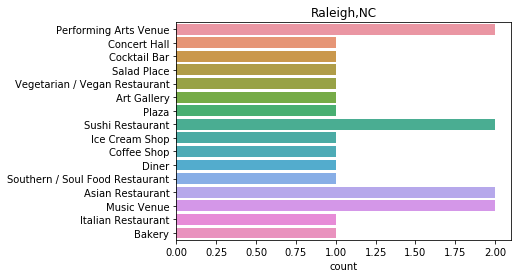

In [13]:
for index in range(len(cities)):
    sns.countplot(y=city_series[index])
    plt.title(cities[index])
    plt.show()

### Initial thoughts
From the looks of it. Some of these locations have things in common when it comes to recommended venues. Many of them seem like they have a diverse set of venues that are recommended based on category.
One city that seems to be different on diversity is Austin, TX, Portland, OR, and Seattle, WA. It seems like it recommends vastly more hotels. This could be an indication that these are more tourist cities, or perhaps most of the people who are using Foursquare are using it to find hotels in these cities.

In [23]:
combined_series = pd.Series([])
for city_serie in city_series:
    combined_series = combined_series.append(city_serie, ignore_index=True)
    
# try to create columns for the various categories
columns = combined_series.unique()

In [37]:
rows = []
for i in range(len(cities)):
    city = cities[i]
    city_serie = city_series[i]
    counts = city_serie.value_counts()
    row = [counts.get(column, 0) for column in columns]
    rows.append(row)

cities_df = pd.DataFrame(data=rows, columns=columns)
cities_df.index = cities
cities_df.head()

,Juice Bar,Coffee Shop,Hotel,Lounge,Seafood Restaurant,Burger Joint,Cocktail Bar,Grocery Store,New American Restaurant,Italian Restaurant,...,Comic Shop,Speakeasy,Food Court,Bookstore,Social Club,Office,Dessert Shop,Salad Place,Art Gallery,Southern / Soul Food Restaurant
"Austin,TX",1,1,5,1,2,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
"Denver,CO",0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Colorado Springs,CO",0,3,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
"Fayetteville,AR",0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Des Moines,IA",0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


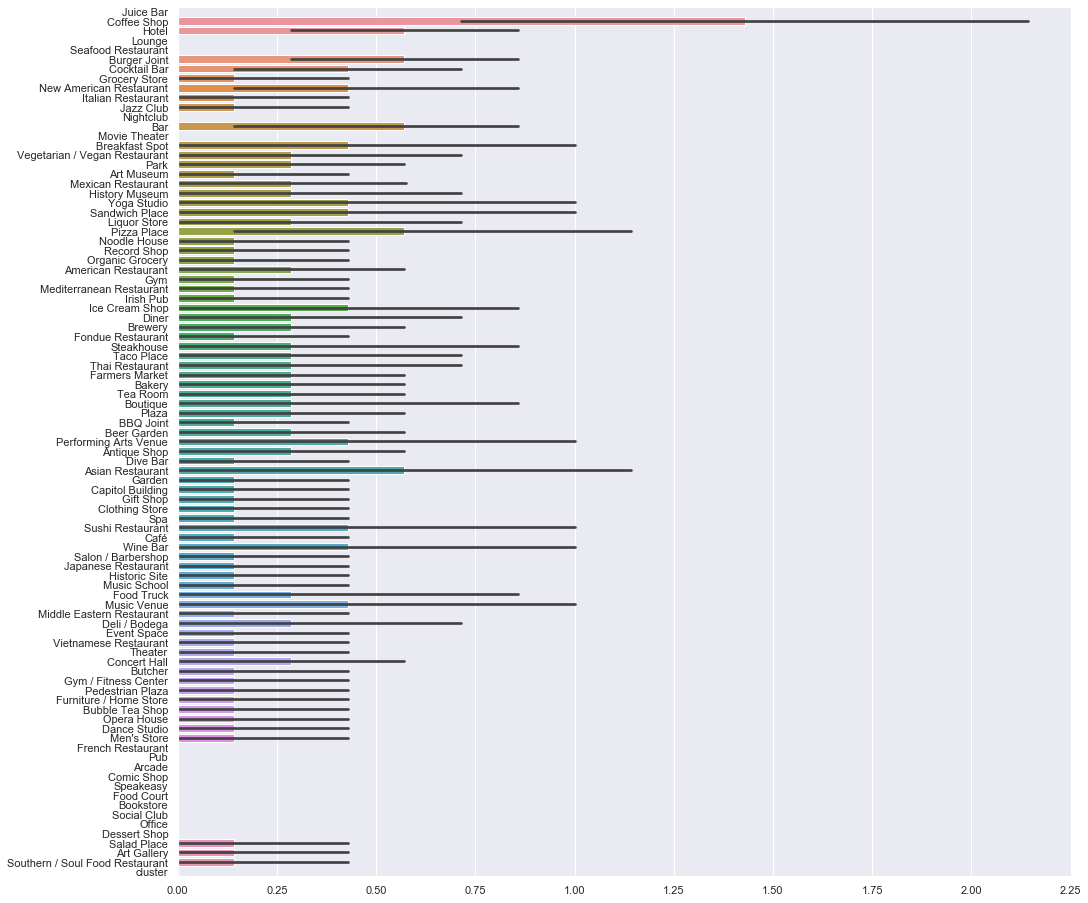

Index(['Denver,CO', 'Colorado Springs,CO', 'Fayetteville,AR', 'Des Moines,IA',
       'Minneapolis,MN', 'San Francisco,CA', 'Raleigh,NC'],
      dtype='object')


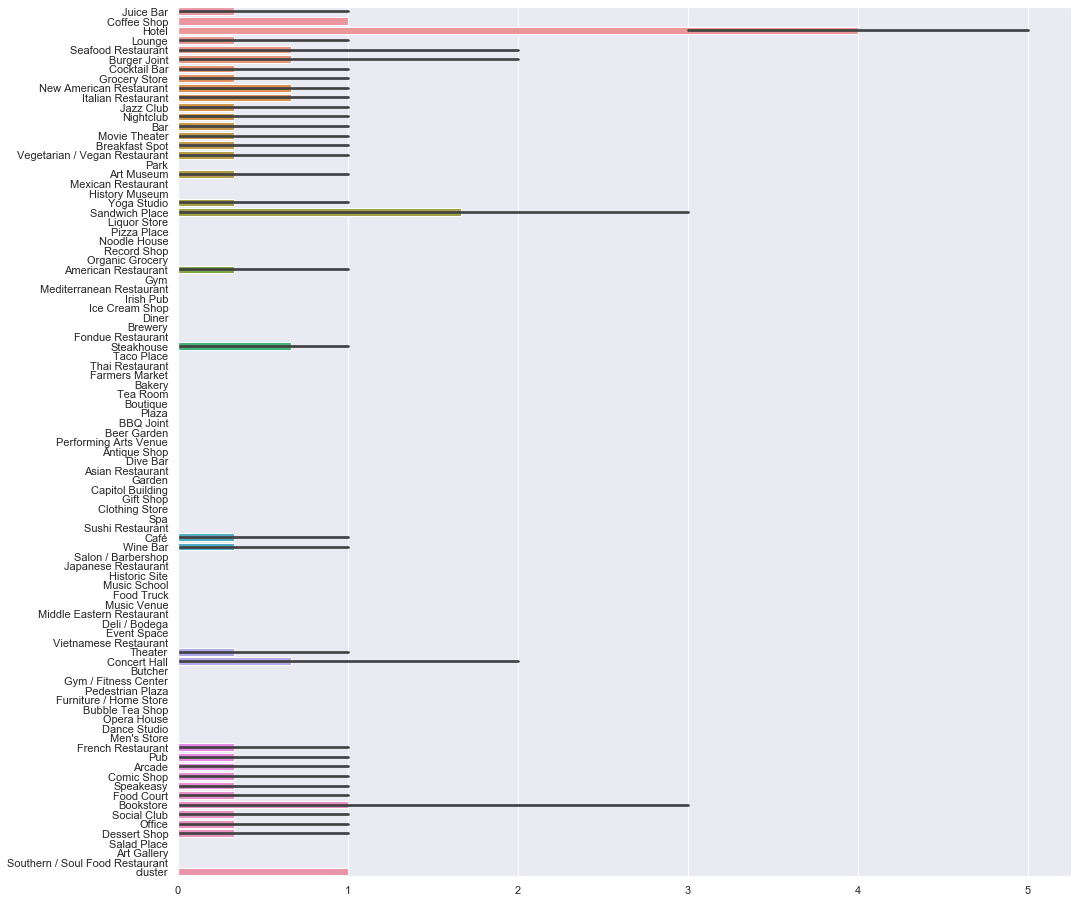

Index(['Austin,TX', 'Portland,OR', 'Seattle,WA'], dtype='object')


In [49]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

num_clusters = 2

kmeans = KMeans(n_clusters=2, random_state=0).fit(cities_df)
cities_df["cluster"] = kmeans.labels_

sns.set(rc={'figure.figsize':(16,16)})
for label in range(num_clusters):
    data_rows = cities_df[cities_df["cluster"]==label]
    sns.barplot(data=data_rows, orient="h")
    plt.show()
    print(data_rows.index)

### Discussion
From the graphs it is quite clear that the Austin, Portland, and Seattle are not as diverse when it comes to recommended venues as the other cities in the best places to live. This could also be because I only chose to get the top 20 recommended venues in all of these cities. One could say that with asking for a larger set of recommended venues I might have been able to have a more accurate idea of what venues are popular in these locations. I could have limited my search to only be fore restuarants so that a restaurant owner could figure out what he/she might need to do to compete. I chose to keep it to all venues because it would allow business owners to have partnerships with other parts of the hospitality industry and will be able to tell what kind of marketing campaigns might work.

### Conclusion
In conclusion I believe that this is eye opening. One could recommend opening a venue that will fill in the gaps for the cities like Austin, Portland, and Seattle where the venue diversity is sparse. On the other hand one could recommend not opening venues that fill in the gaps as it could be concluded that the market in those cities do not demand those venues. To get a better idea of what venues might be popular in cities it might be worth getting other data like the age of the individuals who live there, the proximity of the city to ports (boat docks and airports), and possibly events that take place in the city. Additional considerations might be zoning laws in these various cities.